In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent))
str(Path.cwd().parent)

'/home/ubuntu/varios/skforecast'

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def set_dark_theme(custom_style: dict = None) -> None:
    """
    Set aspects of the visual theme for all matplotlib plots.
    This function changes the global defaults for all plots using the matplotlib
    rcParams system. The theme includes specific colors for figure and axes
    backgrounds, gridlines, text, labels, and ticks. It also sets the font size
    and line width.

    Parameters
    ----------
    custom_style : dict, default None
        Optional dictionary containing custom styles to be added or override the
        default dark theme. It is applied after the default theme is set by
        using the `plt.rcParams.update()` method.
    """
    plt.style.use('fivethirtyeight')
    dark_style = {
        'figure.facecolor': '#212946',
        'axes.facecolor': '#212946',
        'savefig.facecolor':'#212946',
        'axes.grid': True,
        'axes.grid.which': 'both',
        'axes.spines.left': False,
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False,
        'grid.color': '#2A3459',
        'grid.linewidth': '1',
        'text.color': '0.9',
        'axes.labelcolor': '0.9',
        'xtick.color': '0.9',
        'ytick.color': '0.9',
        'font.size': 10,
        'lines.linewidth': 1.5
    }

    if custom_style is not None:
        dark_style.update(custom_style)
        
    plt.rcParams.update(dark_style)

In [5]:
set_dark_theme()

<Axes: xlabel='date'>

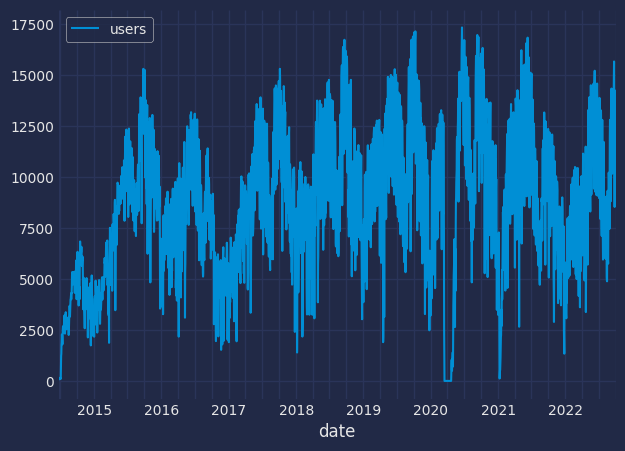

In [6]:
# Data download
# ==============================================================================
url = (
    'https://raw.githubusercontent.com/JoaquinAmatRodrigo/'
    'Estadistica-machine-learning-python/master/data/usuarios_diarios_bicimad.csv'
)
data = pd.read_csv(url, sep=',')

# Data preprocessing
# ==============================================================================
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d')
data = data[['fecha', 'Usos bicis total día']]
data.columns = ['date', 'users']
data = data.set_index('date')
data = data.asfreq('D')
data = data.sort_index()
data.head(3)

data.plot()